In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa

In [536]:
music_df = pd.read_csv('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/panda_dataset_taffc_metadata.csv')

In [542]:
music_df.head()#.transpose()

Song                       Artist                            Title  \
0  MT0000004637                Charlie Poole  Bulldog Down in Sunny Tennessee   
1  MT0000011357                    Dismember              Reborn in Blasphemy   
2  MT0000011975  Curse of the Golden Vampire              Ultrasonic Meltdown   
3  MT0000040632                  Gipsy Kings             Flamencos en el Aire   
4  MT0000044741                Little Walter                       Last Night   

  Quadrant     PQuad  MoodsTotal  Moods  \
0       Q3  0.666667           3      3   
1       Q2  0.666667           3      3   
2       Q2  0.666667           6      5   
3       Q1  0.750000           4      3   
4       Q3  0.750000           4      4   

                                  MoodsFoundStr  \
0                       circular; greasy; messy   
1                    jittery; negative; nervous   
2  fierce; harsh; hostile; menacing; outrageous   
3                            fiery; sexy; spicy   
4                   greasy; gritty; gutsy; lazy   

                                            MoodsStr  \
0                            Circular; Greasy; Messy   
1                          Negative; Nervous/Jittery   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...   
3                      Cathartic; Fiery; Sexy; Spicy   
4                        Greasy; Gritty; Gutsy; Lazy   

                                       MoodsStrSplit  Genres  \
0                            Circular; Greasy; Messy       2   
1                         Negative; Nervous; Jittery       3   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...       1   
3                      Cathartic; Fiery; Sexy; Spicy       2   
4                        Greasy; Gritty; Gutsy; Lazy       1   

                             GenresStr  Sample  \
0               Country; International       1   
1  Electronic; International; Pop/Rock       1   
2                           Electronic       1   
3                  International; Jazz       1   
4                                Blues       1   

                                           SampleURL  
0  http://rovimusic.rovicorp.com/playback.mp3?c=l...  
1  http://rovimusic.rovicorp.com/playback.mp3?c=0...  
2  http://rovimusic.rovicorp.com/playback.mp3?c=_...  
3  http://rovimusic.rovicorp.com/playback.mp3?c=G...  
4  http://rovimusic.rovicorp.com/playback.mp3?c=k...

In [5]:
music_df['Artist'] = music_df['Artist'].isna().fillna('no_name')

In [7]:
chroma_list = []
mel_list = []
mfcc_list = []
file_names = []

import os
import fnmatch  
# Считываем все файлы из папки Q1
folder_path = 'C:/Users/Mary/Desktop/Диплом/all_music/'
#files = os.listdir(folder_path)
files = fnmatch.filter(os.listdir(folder_path), '*.mp3')   

for file in files:
    # Загружаем аудиофайл
    #audio_path = os.path.join(folder_path, file) 
    audio_path = os.path.join(folder_path, file)
    y, sr = librosa.load(audio_path, sr = None, res_type = 'kaiser_fast')
    
    # Вычисляем хромаграмму
    stft_spectrogram=np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S = stft_spectrogram, sr=sr)
    #chroma_list.append(chroma)
    chroma_list.append(chroma.mean(axis=1))



    # Вычисляем Mel-спектрограмму
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    #mel_list.append(mel)
    mel_list.append(mel.mean(axis=1))

    # Вычисляем MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    #mfcc_list.append(mfcc)
    mfcc_list.append(mfcc.mean(axis=1))

    file_names.append(file)


In [9]:
chroma_list[1]

array([0.7789766 , 0.7483069 , 0.81988615, 0.9045561 , 0.7468542 ,
       0.72381115, 0.8422231 , 0.8893128 , 0.8177232 , 0.7977376 ,
       0.77175367, 0.782941  ], dtype=float32)

In [7]:
chroma_df = pd.DataFrame(chroma_list)

In [13]:
file_names[1]

'MT0000011357.mp3'

In [15]:
len(chroma_list)

900

In [17]:
chroma_df.head()

0         1         2         3         4         5         6   \
0  0.617913  0.575823  0.690875  0.559023  0.552913  0.645780  0.481538   
1  0.778977  0.748307  0.819886  0.904556  0.746854  0.723811  0.842223   
2  0.777378  0.785251  0.785614  0.775483  0.736094  0.727539  0.753023   
3  0.572790  0.684784  0.586863  0.665464  0.641850  0.557976  0.655019   
4  0.610754  0.529274  0.528055  0.541806  0.713385  0.677659  0.642765   

         7         8         9         10        11  
0  0.444919  0.406448  0.490795  0.542148  0.489451  
1  0.889313  0.817723  0.797738  0.771754  0.782941  
2  0.737512  0.714993  0.716859  0.728514  0.734106  
3  0.618074  0.739131  0.676854  0.628037  0.690474  
4  0.568847  0.607212  0.720689  0.583549  0.631326

In [19]:
mel_df = pd.DataFrame(mel_list)

In [21]:
mel_df.shape

(900, 128)

In [23]:
mfcc_df = pd.DataFrame(mfcc_list)

In [25]:
mfcc_df.shape

(900, 40)

In [39]:
combined_df = pd.concat([chroma_df, mel_df, mfcc_df, pd.Series(file_names).rename('Song')], axis=1, ignore_index=True)

In [41]:
combined_df['Song']=combined_df[180]
combined_df = combined_df.drop(180,axis = 1)

In [43]:
combined_df.head()

0         1         2         3         4         5         6  \
0  0.617913  0.575823  0.690875  0.559023  0.552913  0.645780  0.481538   
1  0.778977  0.748307  0.819886  0.904556  0.746854  0.723811  0.842223   
2  0.777378  0.785251  0.785614  0.775483  0.736094  0.727539  0.753023   
3  0.572790  0.684784  0.586863  0.665464  0.641850  0.557976  0.655019   
4  0.610754  0.529274  0.528055  0.541806  0.713385  0.677659  0.642765   

          7         8         9  ...       171       172       173       174  \
0  0.444919  0.406448  0.490795  ... -0.020307  2.324166  3.567792  3.883560   
1  0.889313  0.817723  0.797738  ... -1.688632 -3.825361 -0.613288 -3.535904   
2  0.737512  0.714993  0.716859  ... -2.085293 -2.503842 -4.341682 -2.598336   
3  0.618074  0.739131  0.676854  ...  1.663398 -3.054370 -3.469282  0.551196   
4  0.568847  0.607212  0.720689  ... -2.719656 -4.388300  0.210486  0.959180   

        175       176       177       178       179              Song  
0 -1.823020 -2.058319 -5.530811 -2.079775 -2.063657  MT0000004637.mp3  
1 -4.854705 -1.428813 -8.155371  0.105861 -4.854570  MT0000011357.mp3  
2 -3.895139 -0.943562 -4.858965  0.452470 -4.311635  MT0000011975.mp3  
3 -2.130995  1.955830 -1.407931  4.732381 -2.828624  MT0000040632.mp3  
4 -0.584419  3.384225 -4.916590  1.795105 -4.837695  MT0000044741.mp3  

[5 rows x 181 columns]

In [45]:
combined_df['Song'] = combined_df['Song'].str[:12]

In [47]:
combined_df.head()

0         1         2         3         4         5         6  \
0  0.617913  0.575823  0.690875  0.559023  0.552913  0.645780  0.481538   
1  0.778977  0.748307  0.819886  0.904556  0.746854  0.723811  0.842223   
2  0.777378  0.785251  0.785614  0.775483  0.736094  0.727539  0.753023   
3  0.572790  0.684784  0.586863  0.665464  0.641850  0.557976  0.655019   
4  0.610754  0.529274  0.528055  0.541806  0.713385  0.677659  0.642765   

          7         8         9  ...       171       172       173       174  \
0  0.444919  0.406448  0.490795  ... -0.020307  2.324166  3.567792  3.883560   
1  0.889313  0.817723  0.797738  ... -1.688632 -3.825361 -0.613288 -3.535904   
2  0.737512  0.714993  0.716859  ... -2.085293 -2.503842 -4.341682 -2.598336   
3  0.618074  0.739131  0.676854  ...  1.663398 -3.054370 -3.469282  0.551196   
4  0.568847  0.607212  0.720689  ... -2.719656 -4.388300  0.210486  0.959180   

        175       176       177       178       179          Song  
0 -1.823020 -2.058319 -5.530811 -2.079775 -2.063657  MT0000004637  
1 -4.854705 -1.428813 -8.155371  0.105861 -4.854570  MT0000011357  
2 -3.895139 -0.943562 -4.858965  0.452470 -4.311635  MT0000011975  
3 -2.130995  1.955830 -1.407931  4.732381 -2.828624  MT0000040632  
4 -0.584419  3.384225 -4.916590  1.795105 -4.837695  MT0000044741  

[5 rows x 181 columns]

In [49]:
combined_df.shape

(900, 181)

In [51]:
merged_df = pd.merge(music_df, combined_df, on='Song', how='left')

In [53]:
merged_df.head(5)

Song  Artist                            Title Quadrant     PQuad  \
0  MT0000004637   False  Bulldog Down in Sunny Tennessee       Q3  0.666667   
1  MT0000011357   False              Reborn in Blasphemy       Q2  0.666667   
2  MT0000011975   False              Ultrasonic Meltdown       Q2  0.666667   
3  MT0000040632   False             Flamencos en el Aire       Q1  0.750000   
4  MT0000044741   False                       Last Night       Q3  0.750000   

   MoodsTotal  Moods                                 MoodsFoundStr  \
0           3      3                       circular; greasy; messy   
1           3      3                    jittery; negative; nervous   
2           6      5  fierce; harsh; hostile; menacing; outrageous   
3           4      3                            fiery; sexy; spicy   
4           4      4                   greasy; gritty; gutsy; lazy   

                                            MoodsStr  \
0                            Circular; Greasy; Messy   
1                          Negative; Nervous/Jittery   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...   
3                      Cathartic; Fiery; Sexy; Spicy   
4                        Greasy; Gritty; Gutsy; Lazy   

                                       MoodsStrSplit  ...        170  \
0                            Circular; Greasy; Messy  ...   0.598776   
1                         Negative; Nervous; Jittery  ... -10.645964   
2  Fierce; Harsh; Hostile; Menacing; Outrageous; ...  ...  -3.507718   
3                      Cathartic; Fiery; Sexy; Spicy  ...  -4.591261   
4                        Greasy; Gritty; Gutsy; Lazy  ...  -1.376408   

        171       172       173       174       175       176       177  \
0 -0.020307  2.324166  3.567792  3.883560 -1.823020 -2.058319 -5.530811   
1 -1.688632 -3.825361 -0.613288 -3.535904 -4.854705 -1.428813 -8.155371   
2 -2.085293 -2.503842 -4.341682 -2.598336 -3.895139 -0.943562 -4.858965   
3  1.663398 -3.054370 -3.469282  0.551196 -2.130995  1.955830 -1.407931   
4 -2.719656 -4.388300  0.210486  0.959180 -0.584419  3.384225 -4.916590   

        178       179  
0 -2.079775 -2.063657  
1  0.105861 -4.854570  
2  0.452470 -4.311635  
3  4.732381 -2.828624  
4  1.795105 -4.837695  

[5 rows x 194 columns]

In [55]:
final_df = merged_df[['Quadrant'] + list(merged_df.columns[-180:])]
#merged_df = pd.concat(merged_df['Quadrant'], combined_df)
final_df.head()

Quadrant         0         1         2         3         4         5  \
0       Q3  0.617913  0.575823  0.690875  0.559023  0.552913  0.645780   
1       Q2  0.778977  0.748307  0.819886  0.904556  0.746854  0.723811   
2       Q2  0.777378  0.785251  0.785614  0.775483  0.736094  0.727539   
3       Q1  0.572790  0.684784  0.586863  0.665464  0.641850  0.557976   
4       Q3  0.610754  0.529274  0.528055  0.541806  0.713385  0.677659   

          6         7         8  ...        170       171       172       173  \
0  0.481538  0.444919  0.406448  ...   0.598776 -0.020307  2.324166  3.567792   
1  0.842223  0.889313  0.817723  ... -10.645964 -1.688632 -3.825361 -0.613288   
2  0.753023  0.737512  0.714993  ...  -3.507718 -2.085293 -2.503842 -4.341682   
3  0.655019  0.618074  0.739131  ...  -4.591261  1.663398 -3.054370 -3.469282   
4  0.642765  0.568847  0.607212  ...  -1.376408 -2.719656 -4.388300  0.210486   

        174       175       176       177       178       179  
0  3.883560 -1.823020 -2.058319 -5.530811 -2.079775 -2.063657  
1 -3.535904 -4.854705 -1.428813 -8.155371  0.105861 -4.854570  
2 -2.598336 -3.895139 -0.943562 -4.858965  0.452470 -4.311635  
3  0.551196 -2.130995  1.955830 -1.407931  4.732381 -2.828624  
4  0.959180 -0.584419  3.384225 -4.916590  1.795105 -4.837695  

[5 rows x 181 columns]

## Сохранение датафрейма

In [326]:
final_df.to_csv(r'C:\Users\Mary\Desktop\Диплом\final_features_df.csv')

In [11]:
df = pd.read_csv('C:/Users/Mary/Desktop/Диплом/final_features_df.csv')

In [330]:
df.head()

Unnamed: 0 Quadrant         0         1         2         3         4  \
0           0       Q3  0.617913  0.575823  0.690875  0.559023  0.552913   
1           1       Q2  0.778977  0.748307  0.819886  0.904556  0.746854   
2           2       Q2  0.777378  0.785251  0.785614  0.775483  0.736094   
3           3       Q1  0.572790  0.684784  0.586863  0.665464  0.641850   
4           4       Q3  0.610754  0.529274  0.528055  0.541806  0.713385   

          5         6         7  ...        170       171       172       173  \
0  0.645780  0.481538  0.444919  ...   0.598776 -0.020307  2.324166  3.567792   
1  0.723811  0.842223  0.889313  ... -10.645964 -1.688632 -3.825361 -0.613288   
2  0.727539  0.753023  0.737511  ...  -3.507718 -2.085293 -2.503842 -4.341682   
3  0.557976  0.655019  0.618074  ...  -4.591261  1.663398 -3.054370 -3.469282   
4  0.677659  0.642765  0.568847  ...  -1.376408 -2.719656 -4.388300  0.210486   

        174       175       176       177       178       179  
0  3.883560 -1.823020 -2.058319 -5.530811 -2.079775 -2.063657  
1 -3.535904 -4.854705 -1.428813 -8.155371  0.105861 -4.854570  
2 -2.598336 -3.895138 -0.943562 -4.858965  0.452470 -4.311635  
3  0.551196 -2.130995  1.955830 -1.407931  4.732381 -2.828623  
4  0.959180 -0.584419  3.384225 -4.916590  1.795105 -4.837695  

[5 rows x 182 columns]

In [334]:
df = df.drop('Unnamed: 0', axis = 1)

In [336]:
df.head()

Quadrant         0         1         2         3         4         5  \
0       Q3  0.617913  0.575823  0.690875  0.559023  0.552913  0.645780   
1       Q2  0.778977  0.748307  0.819886  0.904556  0.746854  0.723811   
2       Q2  0.777378  0.785251  0.785614  0.775483  0.736094  0.727539   
3       Q1  0.572790  0.684784  0.586863  0.665464  0.641850  0.557976   
4       Q3  0.610754  0.529274  0.528055  0.541806  0.713385  0.677659   

          6         7         8  ...        170       171       172       173  \
0  0.481538  0.444919  0.406448  ...   0.598776 -0.020307  2.324166  3.567792   
1  0.842223  0.889313  0.817723  ... -10.645964 -1.688632 -3.825361 -0.613288   
2  0.753023  0.737511  0.714993  ...  -3.507718 -2.085293 -2.503842 -4.341682   
3  0.655019  0.618074  0.739131  ...  -4.591261  1.663398 -3.054370 -3.469282   
4  0.642765  0.568847  0.607212  ...  -1.376408 -2.719656 -4.388300  0.210486   

        174       175       176       177       178       179  
0  3.883560 -1.823020 -2.058319 -5.530811 -2.079775 -2.063657  
1 -3.535904 -4.854705 -1.428813 -8.155371  0.105861 -4.854570  
2 -2.598336 -3.895138 -0.943562 -4.858965  0.452470 -4.311635  
3  0.551196 -2.130995  1.955830 -1.407931  4.732381 -2.828623  
4  0.959180 -0.584419  3.384225 -4.916590  1.795105 -4.837695  

[5 rows x 181 columns]

## Баланс классов

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa

In [12]:
df = pd.read_csv('C:/Users/Mary/Desktop/Диплом/final_features_df.csv')

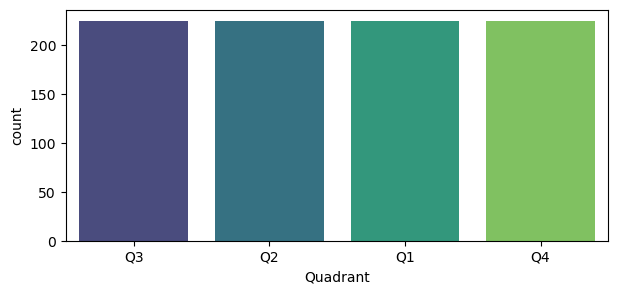

In [36]:
plt.figure(figsize=(7,3))
sns.countplot(data=df, x=df['Quadrant'], hue = 'Quadrant', palette="viridis");

## Модели

In [338]:
X = df.drop('Quadrant',axis=1)
y = df['Quadrant']

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [344]:
scaler = StandardScaler()

In [346]:
scal_X_train = scaler.fit_transform(X_train)
scal_X_test = scaler.transform(X_test)

## Логистическая регрессия 

In [989]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [1]:
#help(LogisticRegression)

In [1028]:
penalty = ['l1', 'l2', 'elasticnet']
dual = [True,False]
fit_intercept = [True,False]
intercept_scaling = [0.01, 0.1, 1]
C = np.logspace(0, 1, 1000)
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [1030]:
param_grid = {'penalty':penalty,
             'dual':dual,
             'fit_intercept':fit_intercept,
             'intercept_scaling':intercept_scaling,
             'solver': solver,
              'C':C
             } 

In [1032]:
log_model = LogisticRegression()
log_grid = GridSearchCV(log_model,param_grid)

In [ ]:
log_grid.fit(scal_X_train, y_train)

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to 

In [ ]:
log_grid.best_params_ 

In [103]:
penalty = ['l2']
C = np.logspace(0, 1.1, 1000)

In [310]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [38]:
#grid_model.fit(scal_X_train, y_train)

In [ ]:
#grid.best_params_ 

#### Вообще без подбора параметров

In [993]:
log_model.fit(scal_X_train, y_train)

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [997]:
log_pred = log_model.predict(scal_X_test)

In [999]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

          Q1       0.54      0.60      0.57        35
          Q2       0.75      0.64      0.69        33
          Q3       0.36      0.39      0.38        33
          Q4       0.34      0.32      0.33        34

    accuracy                           0.49       135
   macro avg       0.50      0.49      0.49       135
weighted avg       0.50      0.49      0.49       135



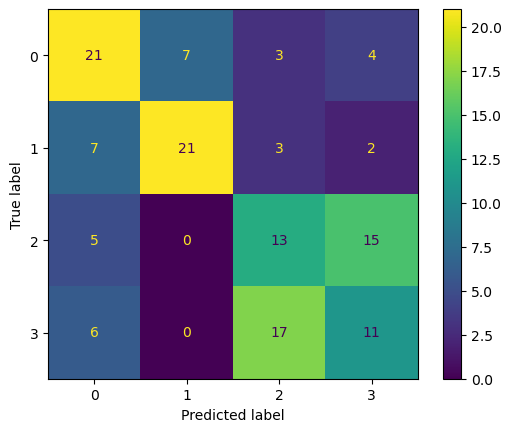

In [1001]:
ConfusionMatrixDisplay(confusion_matrix(y_test,log_pred)).plot()

## Ближайшие соседи

In [352]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier()

In [137]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [139]:
operations = [('scaler',scaler),('knn',knn)]

In [354]:
from sklearn.pipeline import Pipeline

In [143]:
pipe = Pipeline(operations)

In [145]:
k_values = list(range(1,30))

In [157]:
knn__leaf_size = list(range(1,30))

In [159]:
param_grid = {'knn__n_neighbors': k_values, 'knn__leaf_size': knn__leaf_size}

In [161]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [163]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28,
                                            29],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [165]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(leaf_size=1, n_neighbors=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(leaf_size=1, n_neighbors=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 1,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [169]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.45432099, 0.43950617, 0.47654321, 0.48641975, 0.48641975,
       0.47654321, 0.50617284, 0.49506173, 0.51111111, 0.50864198,
       0.51851852, 0.53950617, 0.5308642 , 0.54444444, 0.55185185,
       0.54197531, 0.54691358, 0.54444444, 0.5382716 , 0.53333333,
       0.55308642, 0.54074074, 0.55308642, 0.55061728, 0.55308642,
       0.53950617, 0.5345679 , 0.54567901, 0.54320988, 0.45432099,
       0.43950617, 0.47654321, 0.48641975, 0.48641975, 0.47654321,
       0.50617284, 0.49506173, 0.51111111, 0.50864198, 0.51851852,
       0.53950617, 0.5308642 , 0.54444444, 0.55185185, 0.54197531,
       0.54691358, 0.54444444, 0.5382716 , 0.53333333, 0.55308642,
       0.54074074, 0.55308642, 0.55061728, 0.55308642, 0.53950617,
       0.5345679 , 0.54567901, 0.54320988, 0.45432099, 0.43950617,
       0.47654321, 0.48641975, 0.48641975, 0.47654321, 0.50617284,
       0.49506173, 0.51111111, 0.50864198, 0.51851852, 0.53950617,
       0.5308642 , 0.54444444, 0.55185185, 0.54197531, 0.54691

In [239]:
scaler = StandardScaler()
knn21 = KNeighborsClassifier(n_neighbors=21, leaf_size=1)
operations = [('scaler',scaler),('knn14',knn21)]

In [241]:
pipe = Pipeline(operations)

In [243]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(leaf_size=1, n_neighbors=21))])

In [245]:
pipe_pred = pipe.predict(X_test)

In [356]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay

In [251]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

          Q1       0.51      0.60      0.55        35
          Q2       0.73      0.67      0.70        33
          Q3       0.45      0.52      0.48        33
          Q4       0.50      0.38      0.43        34

    accuracy                           0.54       135
   macro avg       0.55      0.54      0.54       135
weighted avg       0.55      0.54      0.54       135



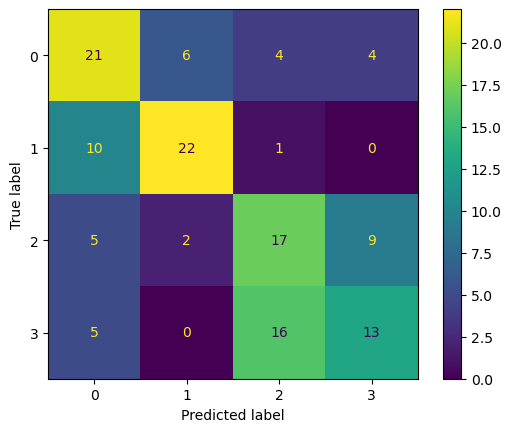

In [253]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pipe_pred)).plot()

## Опорные вектора

In [611]:
from sklearn.svm import SVC # Support Vector Classifie

In [613]:
svc = SVC()

In [615]:
param_grid = {'C':[0.005,0.01,0.08,0.5,1],'gamma':['scale','auto'], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svc_grid = GridSearchCV(svc,param_grid)

In [340]:
#help(param_grid)

In [617]:
svc_grid.fit(scal_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.08, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [619]:
svc_grid.best_params_

{'C': 0.005, 'gamma': 'scale', 'kernel': 'linear'}

In [623]:
svc_grid_pred = svc_grid.predict(scal_X_test)

In [625]:
print(classification_report(y_test,svc_grid_pred))

              precision    recall  f1-score   support

          Q1       0.52      0.49      0.50        35
          Q2       0.79      0.67      0.72        33
          Q3       0.40      0.36      0.38        33
          Q4       0.45      0.59      0.51        34

    accuracy                           0.53       135
   macro avg       0.54      0.53      0.53       135
weighted avg       0.54      0.53      0.53       135



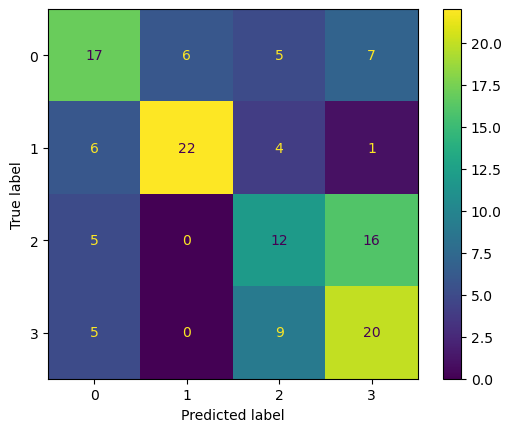

In [627]:
ConfusionMatrixDisplay(confusion_matrix(y_test,svc_grid_pred)).plot()

In [633]:
svc = SVC(C=0.005, gamma = 'scale', kernel = 'linear')

In [639]:
svc.fit(scal_X_train, y_train)

SVC(C=0.005, kernel='linear')

In [641]:
svc_pred = svc.predict(scal_X_test)

In [643]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

          Q1       0.52      0.49      0.50        35
          Q2       0.79      0.67      0.72        33
          Q3       0.40      0.36      0.38        33
          Q4       0.45      0.59      0.51        34

    accuracy                           0.53       135
   macro avg       0.54      0.53      0.53       135
weighted avg       0.54      0.53      0.53       135



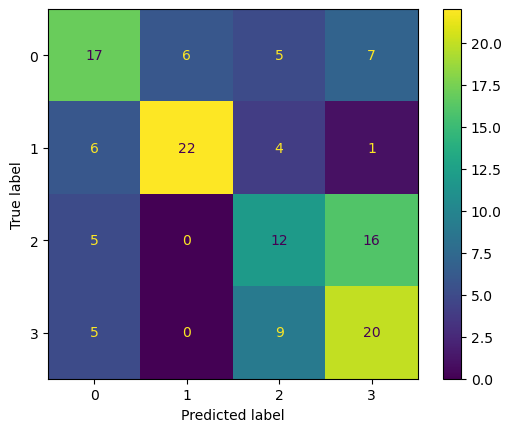

In [647]:
ConfusionMatrixDisplay(confusion_matrix(y_test,svc_pred)).plot()

## Дерево решений

In [549]:
from sklearn.tree import DecisionTreeClassifier

In [551]:
dt = DecisionTreeClassifier()

In [553]:
param_grid = {'max_depth':[6, 7, 8, 9, 10],'max_leaf_nodes':[14, 15, 16, 17, 18, 19], 'criterion':['gini', 'entropy']}
grid = GridSearchCV(dt,param_grid)

In [555]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_leaf_nodes': [14, 15, 16, 17, 18, 19]})

In [559]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [565]:
dt = DecisionTreeClassifier(max_depth=7, 
                            max_leaf_nodes=16,
                            min_samples_split=2,
                            criterion='gini') 

In [567]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=16)

In [545]:
from sklearn.tree import plot_tree

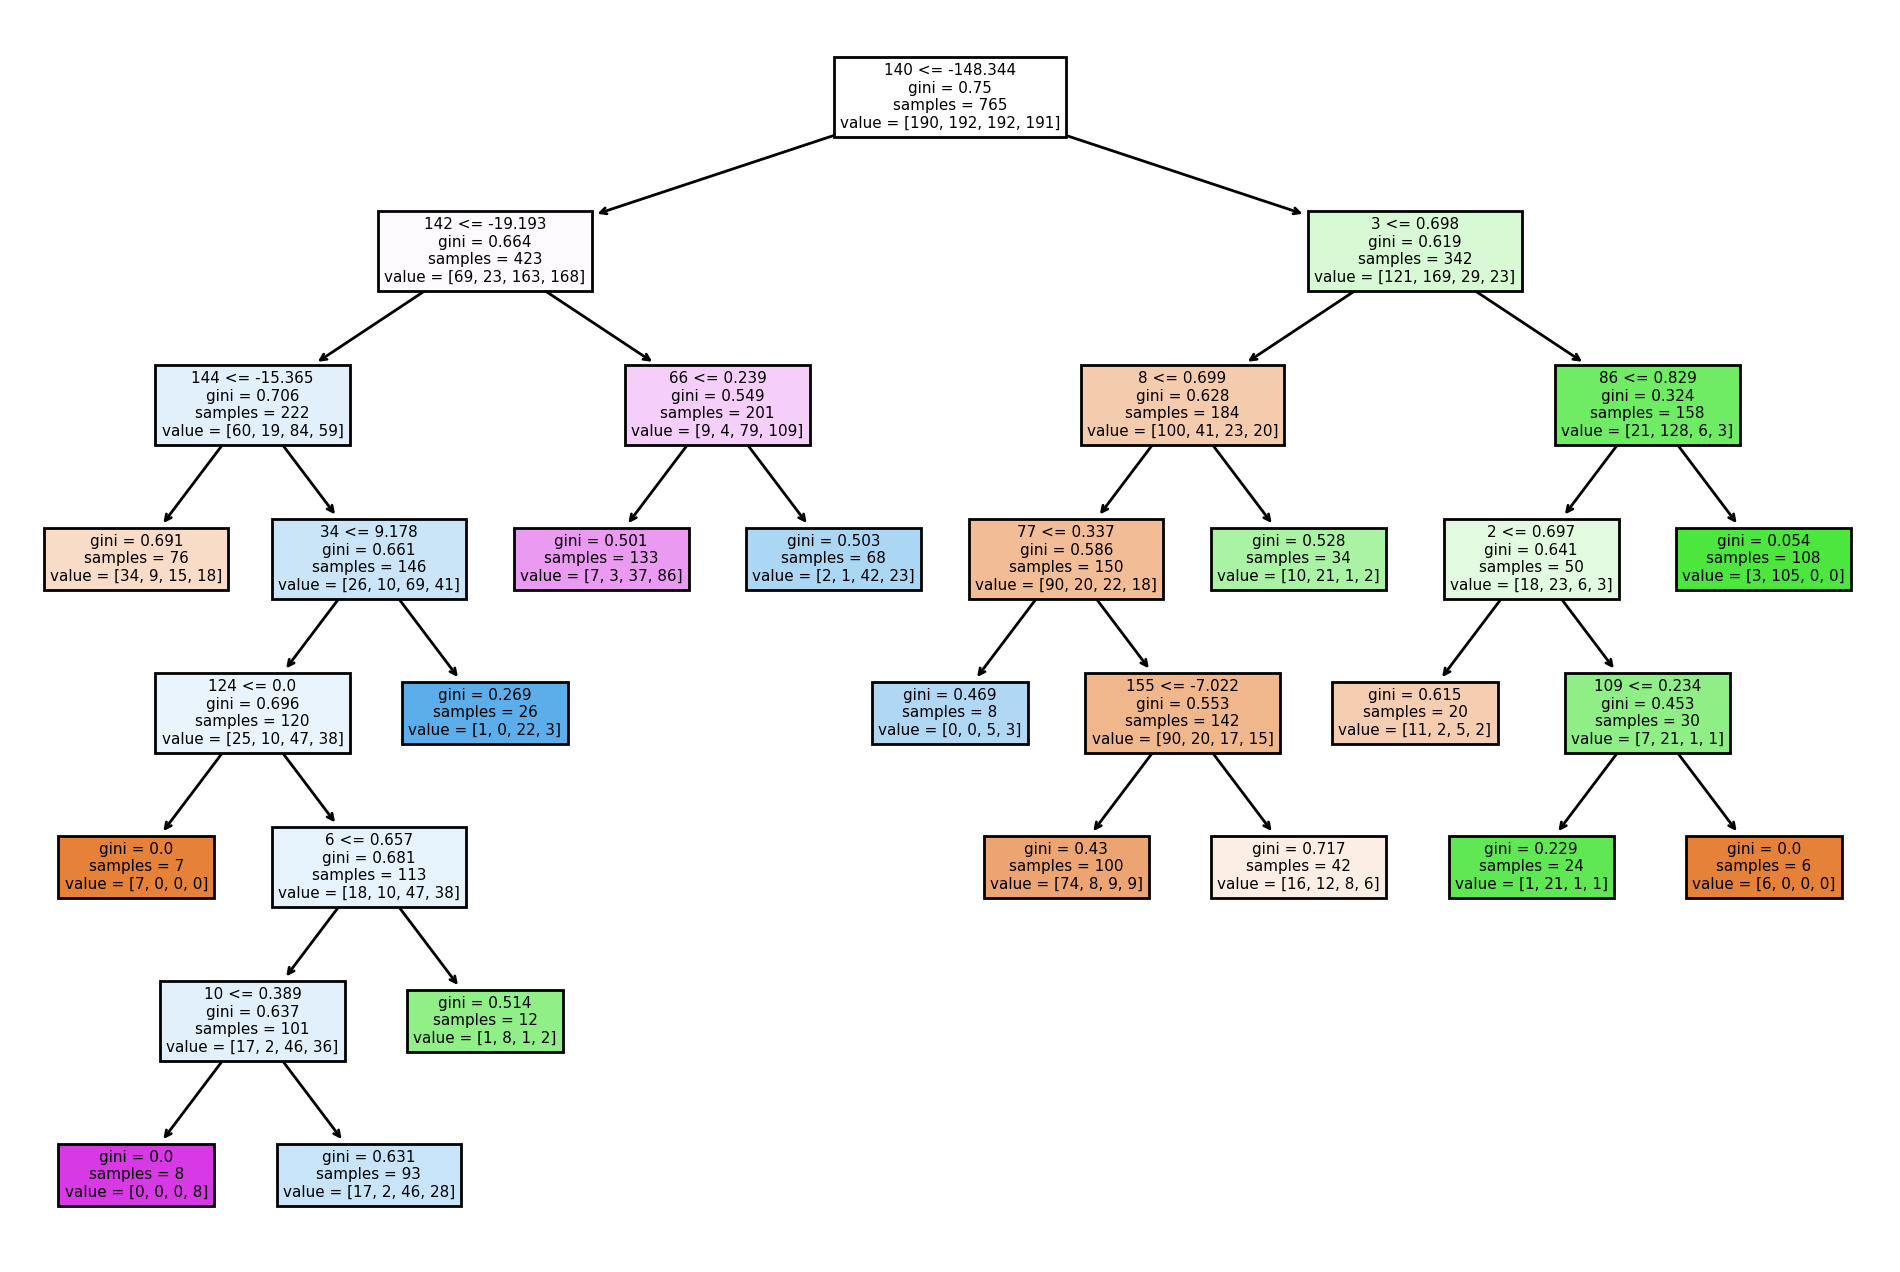

In [949]:
plt.figure(figsize=(12,8), dpi = 200)
plot_tree(dt, filled=True,feature_names=X.columns);

In [602]:
dt_pred = dt.predict(X_test)

In [604]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

          Q1       0.40      0.54      0.46        35
          Q2       0.70      0.58      0.63        33
          Q3       0.34      0.30      0.32        33
          Q4       0.45      0.41      0.43        34

    accuracy                           0.46       135
   macro avg       0.47      0.46      0.46       135
weighted avg       0.47      0.46      0.46       135



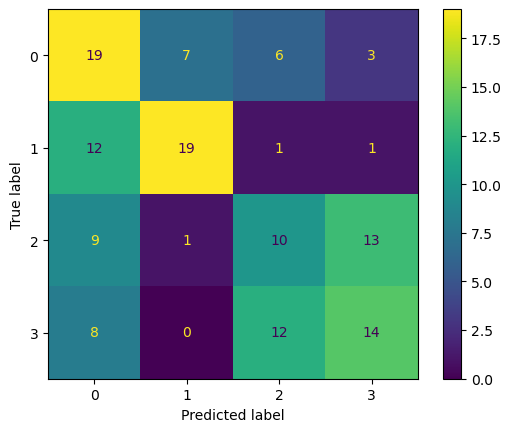

In [608]:
ConfusionMatrixDisplay(confusion_matrix(y_test,dt_pred)).plot();

In [100]:
grid_dt_pred = grid.predict(X_test)

In [102]:
print(classification_report(y_test,grid_dt_pred))

              precision    recall  f1-score   support

          Q1       0.43      0.51      0.47        35
          Q2       0.70      0.58      0.63        33
          Q3       0.34      0.30      0.32        33
          Q4       0.43      0.47      0.45        34

    accuracy                           0.47       135
   macro avg       0.48      0.47      0.47       135
weighted avg       0.48      0.47      0.47       135



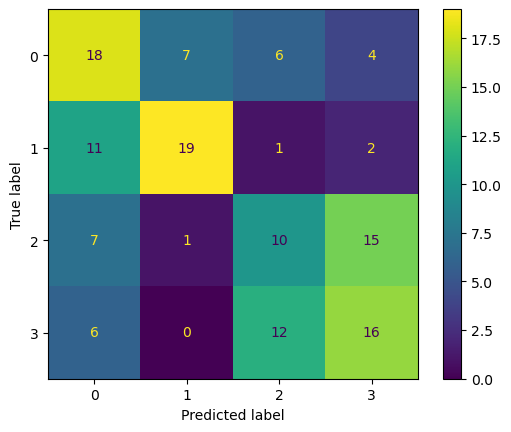

In [104]:
ConfusionMatrixDisplay(confusion_matrix(y_test,dt_pred)).plot()

## Случайные леса

In [362]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
n_estimators=[64, 100, 128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
criterion =['gini', 'entropy']

In [209]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score,
             'criterion': criterion,
             }  # oob_score имеет смысл только при bootstrap=True!

In [211]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [213]:
grid.fit(X_train,y_train)

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [215]:
grid.best_params_ 

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 3,
 'n_estimators': 128,
 'oob_score': False}

In [217]:
rfc_pred = grid.predict(X_test)

In [219]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          Q1       0.61      0.54      0.58        35
          Q2       0.73      0.73      0.73        33
          Q3       0.43      0.36      0.39        33
          Q4       0.58      0.74      0.65        34

    accuracy                           0.59       135
   macro avg       0.59      0.59      0.59       135
weighted avg       0.59      0.59      0.59       135



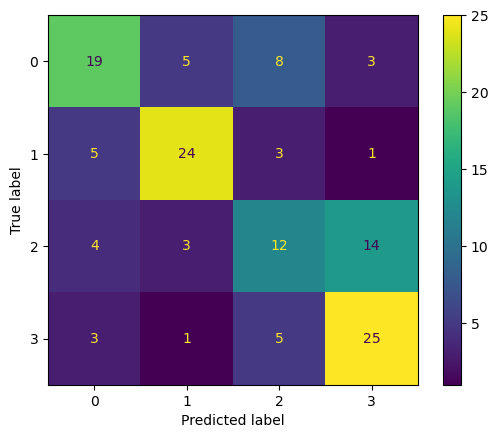

In [221]:
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred)).plot()

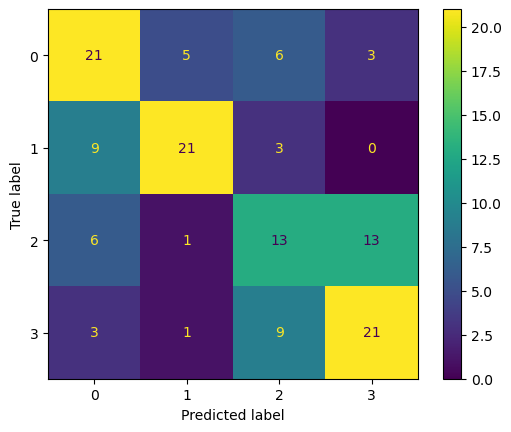

In [155]:
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred)).plot()

In [761]:
error_rates = []

for n in range(10,130):
    
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

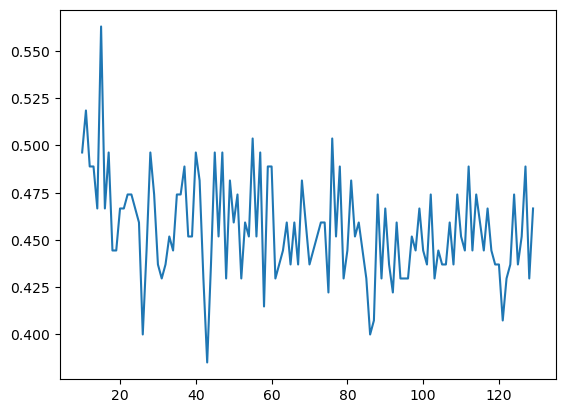

In [767]:
plt.plot(range(10,130),error_rates)

In [889]:
rfc = RandomForestClassifier(bootstrap = True, 
                             criterion = 'entropy', 
                             max_features = 3, 
                             n_estimators = 100, 
                             oob_score = False)

In [893]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=3)

In [895]:
rfc_preds = rfc.predict(X_test)

In [897]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

          Q1       0.61      0.66      0.63        35
          Q2       0.72      0.64      0.68        33
          Q3       0.45      0.42      0.44        33
          Q4       0.62      0.68      0.65        34

    accuracy                           0.60       135
   macro avg       0.60      0.60      0.60       135
weighted avg       0.60      0.60      0.60       135



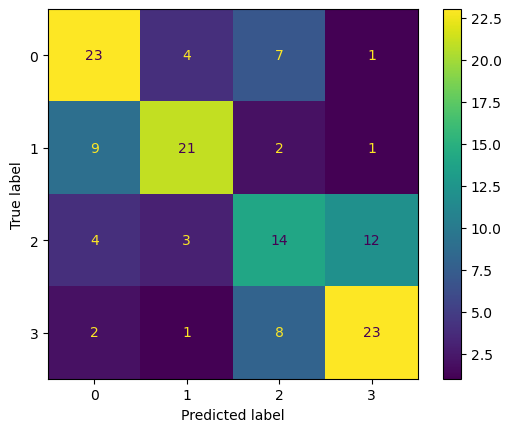

In [899]:
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_preds)).plot()

In [901]:
rfc = RandomForestClassifier(n_estimators = 100)

In [903]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [905]:
rfc_preds = rfc.predict(X_test)

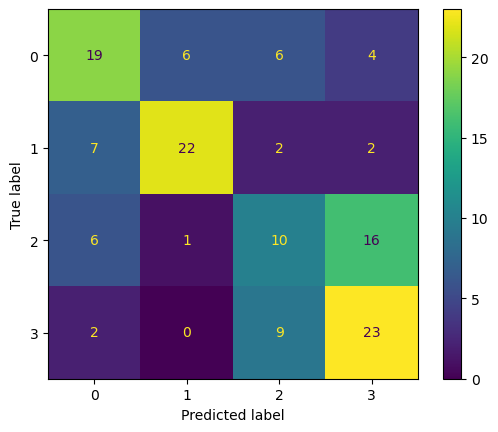

In [907]:
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_preds)).plot()

## AdaBoost - Адаптивный бустинг

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [230]:
#help(AdaBoostClassifier)

In [13]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

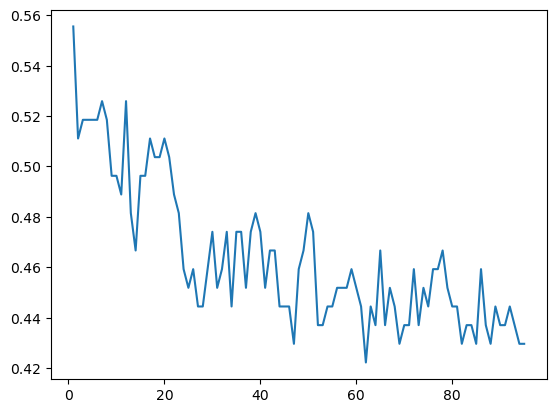

In [272]:
plt.plot(range(1,96),error_rates)

In [943]:
abc = AdaBoostClassifier(n_estimators=90)
abc.fit(X_train,y_train)
abc_preds = abc.predict(X_test)

In [944]:
print(classification_report(y_test,abc_preds))

              precision    recall  f1-score   support

          Q1       0.56      0.57      0.56        35
          Q2       0.81      0.64      0.71        33
          Q3       0.42      0.42      0.42        33
          Q4       0.50      0.59      0.54        34

    accuracy                           0.56       135
   macro avg       0.57      0.56      0.56       135
weighted avg       0.57      0.56      0.56       135



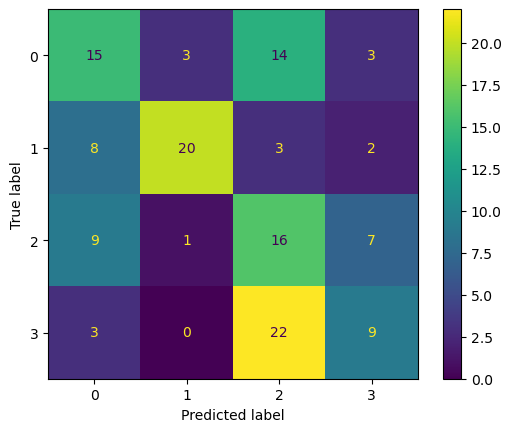

In [947]:
ConfusionMatrixDisplay(confusion_matrix(y_test,abc_pred)).plot()

## Градиентный бустинг

In [366]:
from sklearn.ensemble import GradientBoostingClassifier

In [951]:
#help(GradientBoostingClassifier)

In [971]:
n_estimators=[64, 100, 128,200]
learning_rate = [0.01, 0.1, 1, 10]
max_leaf_nodes  = [0, 1, 3, 5]
validation_fraction = [0.1, 0.2, 0.3]

In [973]:
param_grid = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,
              'max_leaf_nodes':max_leaf_nodes,
              'validation_fraction':validation_fraction,
             }

In [975]:
gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(gbc,param_grid)

In [977]:
gbc_grid.fit(X_train, y_train)

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mary\.conda\a

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_leaf_nodes': [0, 1, 3, 5],
                         'n_estimators': [64, 100, 128, 200],
                         'validation_fraction': [0.1, 0.2, 0.3]})

In [981]:
gbc_grid.best_params_ 

{'learning_rate': 0.1,
 'max_leaf_nodes': 5,
 'n_estimators': 100,
 'validation_fraction': 0.1}

In [983]:
gbc = GradientBoostingClassifier(max_leaf_nodes=5, n_estimators=100, learning_rate=0.1, validation_fraction = 0.1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_leaf_nodes=5)

In [985]:
print(classification_report(y_test,gbc_preds))

              precision    recall  f1-score   support

          Q1       0.53      0.54      0.54        35
          Q2       0.73      0.73      0.73        33
          Q3       0.39      0.36      0.38        33
          Q4       0.51      0.53      0.52        34

    accuracy                           0.54       135
   macro avg       0.54      0.54      0.54       135
weighted avg       0.54      0.54      0.54       135



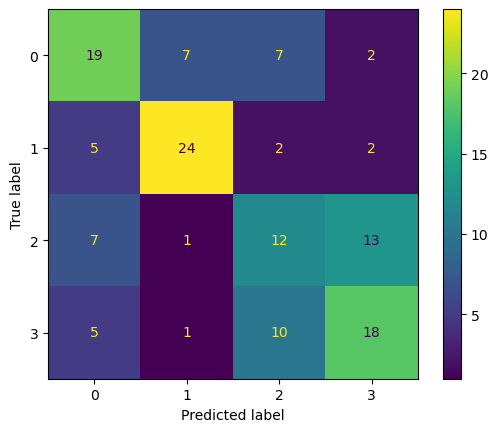

In [987]:
ConfusionMatrixDisplay(confusion_matrix(y_test,gbc_preds)).plot()